In [1]:
# !pip install mpl-scatter-density

In [58]:
dfmark = pd.DataFrame(["no"],columns=["is_done"])
dfmark.to_csv("is_done.csv", index=False)

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_695082/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import gaussian_kde

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
df = pd.read_csv("./data/1mill_dataset.csv", names=["strand","energy"],dtype={0: str, 1: float})
df = df.head(30000)
df.head()

,strand,energy
0,GAATCTTCGCACTCTAGCTGACCGCCTTCAGTAGTACGAATCTGGA...,-5.329171
1,AAGAAGCGGGAAGCATATCTTTATTCAGTTCCTAAT,-1.687614
2,CCTAATCGGGAATTGTTCCTCTTCCATTTGTAATGGTTATAAGAGG...,-7.224524
3,CACCGGGGCATTTATCCCGGGCTCGAAGGAAGTCTTGG,-7.222121
4,CTCGGGAAGCAAAACCCCTAG,-1.601845


In [51]:
def count_A(str1):
    return str1.count("A")

def count_G(str1):
    return str1.count("G")

def count_C(str1):
    return str1.count("C")

def count_T(str1):
    return str1.count("T")

def get_start(str1):
    return str1[0]

def get_end(str1):
    return str1[-1]

def get_startend(str1):
    return str1[0]+str1[-1]

df["len"] = df.strand.apply(len)
df["ct_A"] = df.strand.apply(count_A)
df["ct_G"] = df.strand.apply(count_G)
df["ct_C"] = df.strand.apply(count_C)
df["ct_T"] = df.strand.apply(count_T)
df["start_L"] =  df.strand.apply(get_start)
df["end_L"] = df.strand.apply(get_end)
df["startend_LL"] = df.strand.apply(get_startend)

dict_AGCT_1234 = {"A":1,"G":2,"C":3,"T":4}

dict_LL_1_8 = {
    "AA":1,
    "AG":2,
    "GA":2,
    "AC":3,
    "CA":3,
    "AT":4,
    "TA":4,
    "GG":5,
    "GC":6,
    "CG":6,
    "GT":7,
    "TG":7,
    "CC":8,
    "CT":9,
    "TC":9,
    "TT":10
}

dict_LL_18_unique = {
    "AA":1,
    "AG":2,
    "AC":3,
    "AT":4,
    "GG":5,
    "GC":6,
    "GT":7,
    "CC":8,
    "CT":9,
    "TT":10
}

dict_18_LL_unique = {v: k for k, v in dict_LL_18_unique.items()}


df["start_L_code"] = df.start_L.map(dict_AGCT_1234)
df["end_L_code"] = df.end_L.map(dict_AGCT_1234)

df["startend_LL_code"] = df.startend_LL.map(dict_LL_1_8)

df["ct_A_div_len"] = df.ct_A / df.len
df["ct_G_div_len"] = df.ct_G / df.len


df.head()

,strand,energy,len,ct_A,ct_G,ct_C,ct_T,start_L,end_L,startend_LL,start_L_code,end_L_code,startend_LL_code,ct_A_div_len,ct_G_div_len
0,GAATCTTCGCACTCTAGCTGACCGCCTTCAGTAGTACGAATCTGGA...,-5.329171,55,12,11,19,13,G,C,GC,2,3,6,0.218182,0.200000
1,AAGAAGCGGGAAGCATATCTTTATTCAGTTCCTAAT,-1.687614,36,12,7,6,11,A,T,AT,1,4,4,0.333333,0.194444
2,CCTAATCGGGAATTGTTCCTCTTCCATTTGTAATGGTTATAAGAGG...,-7.224524,59,15,16,10,18,C,A,CA,3,1,3,0.254237,0.271186
3,CACCGGGGCATTTATCCCGGGCTCGAAGGAAGTCTTGG,-7.222121,38,7,13,10,8,C,G,CG,3,2,6,0.184211,0.342105
4,CTCGGGAAGCAAAACCCCTAG,-1.601845,21,7,5,7,2,C,G,CG,3,2,6,0.333333,0.238095


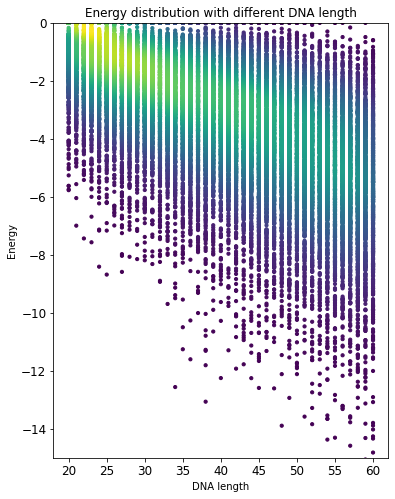

In [48]:
x = df.len
y = df.energy

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots(figsize=(6, 8))
ax.scatter(x, y, c=z, s=10)
plt.ylabel("Energy")
plt.xlabel("DNA length")
plt.ylim(-15,0)
plt.title("Energy distribution with different DNA length")
plt.show()

In [38]:
dict_18_LL_unique

{1: 'AA',
 2: 'AG',
 3: 'AC',
 4: 'AT',
 5: 'GG',
 6: 'GC',
 7: 'GT',
 8: 'CC',
 9: 'CT',
 10: 'TT'}

['AA', 'AG', 'AC', 'AT', 'GG', 'GC', 'GT', 'CC', 'CT', 'TT']


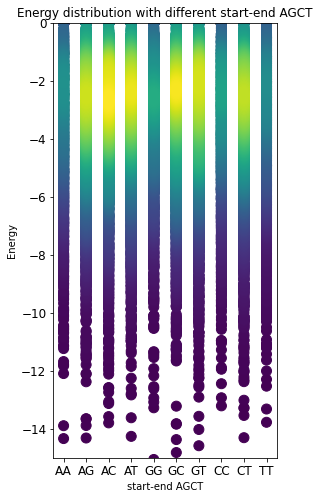

In [56]:
x = df.startend_LL_code
y = df.energy

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots(figsize=(4, 8))
ax.scatter(x, y, c=z, s=100)
plt.ylabel("Energy")
plt.xlabel("start-end AGCT")
plt.ylim(-15,0)
plt.title("Energy distribution with different start-end AGCT")

labels = [v for k, v in dict_18_LL_unique.items()]
print(labels)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
ax.set_xticklabels(labels)

plt.show()

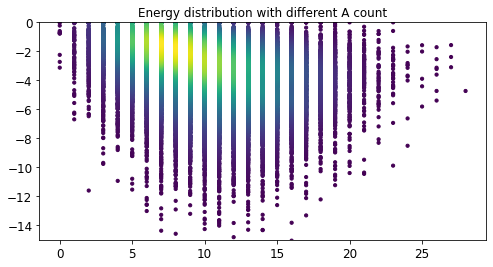

In [50]:
# plt.figure(figsize=(20, 10))
# sns.scatterplot(data=df, x="ct_A", y="energy")

x = df.ct_A
y = df.energy

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y, c=z, s=10)
plt.ylim(-15,0)
plt.title("Energy distribution with different A count")

plt.show()

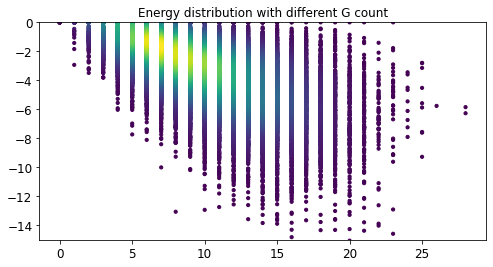

In [52]:
# plt.figure(figsize=(20, 10))
# sns.scatterplot(data=df, x="ct_G", y="energy")

x = df.ct_G
y = df.energy

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y, c=z, s=10)
plt.ylim(-15,0)
plt.title("Energy distribution with different G count")

plt.show()

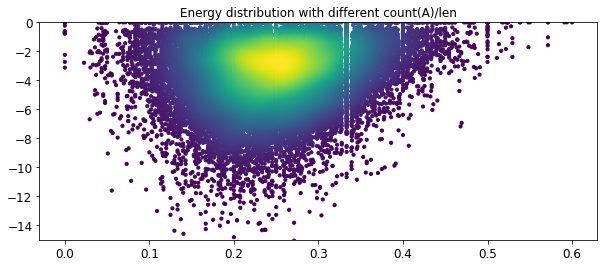

In [53]:
x = df.ct_A_div_len
y = df.energy

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(x, y, c=z, s=10)
plt.ylim(-15,0)
plt.title("Energy distribution with different count(A)/len")

plt.show()

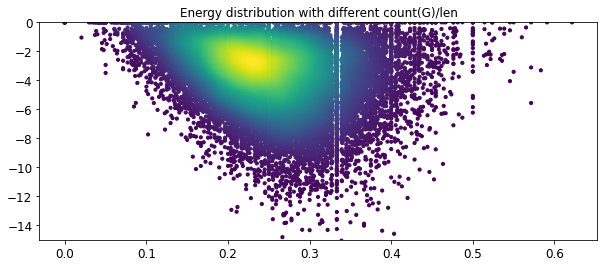

In [54]:
x = df.ct_G_div_len
y = df.energy

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(x, y, c=z, s=10)
plt.ylim(-15,0)
plt.title("Energy distribution with different count(G)/len")

plt.show()

<AxesSubplot:xlabel='ct_C', ylabel='energy'>

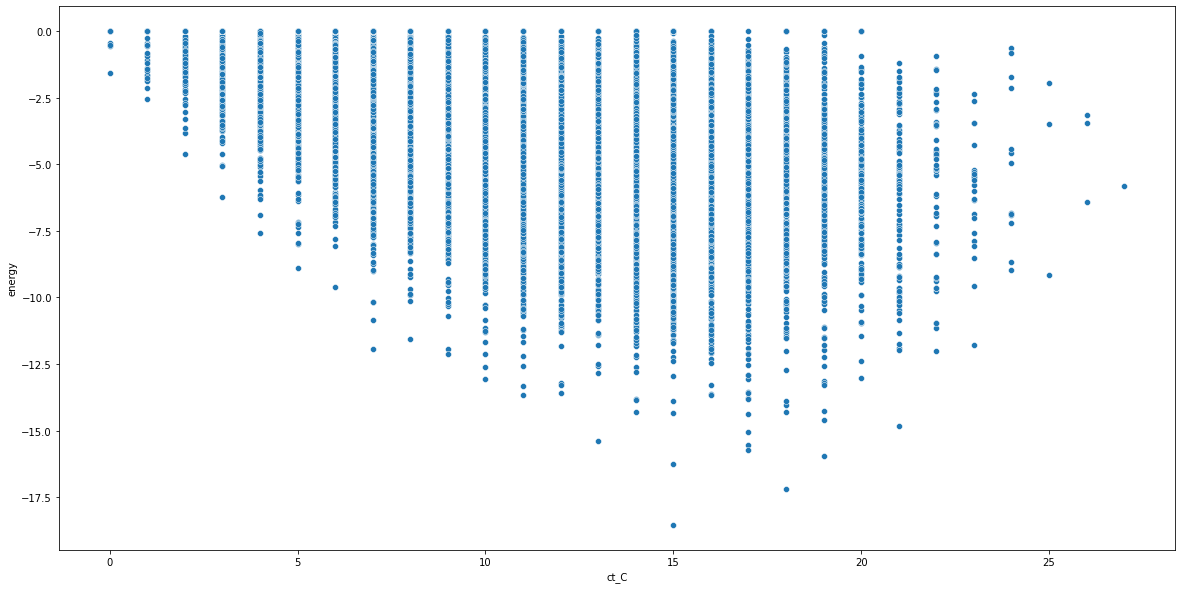

In [9]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="ct_C", y="energy")

<AxesSubplot:xlabel='ct_T', ylabel='energy'>

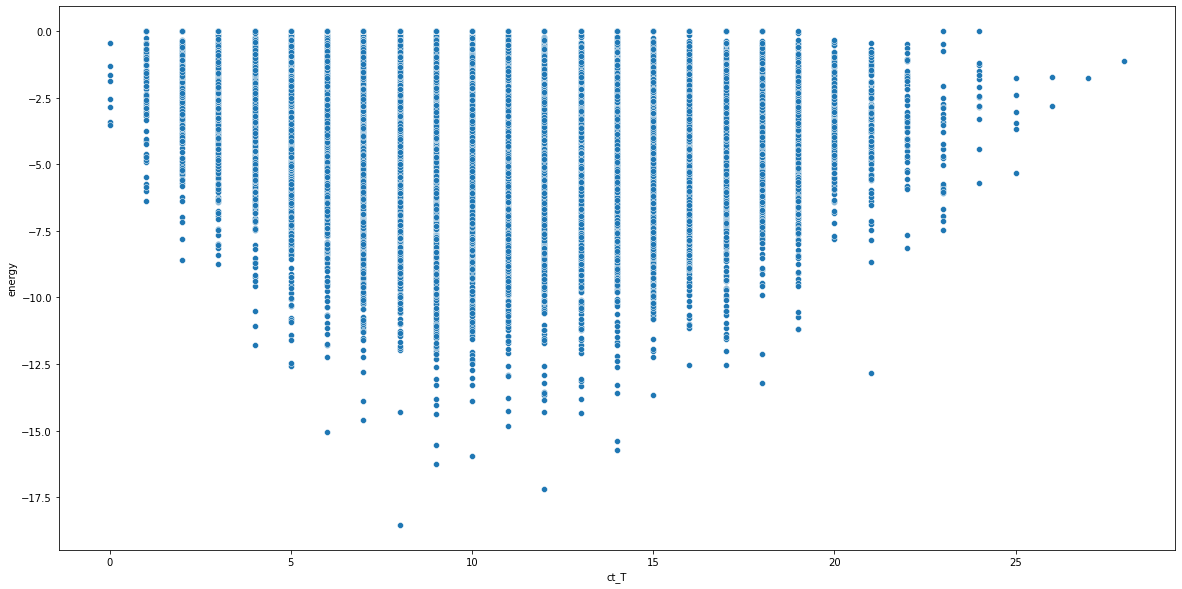

In [10]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="ct_T", y="energy")

<AxesSubplot:xlabel='start_L', ylabel='energy'>

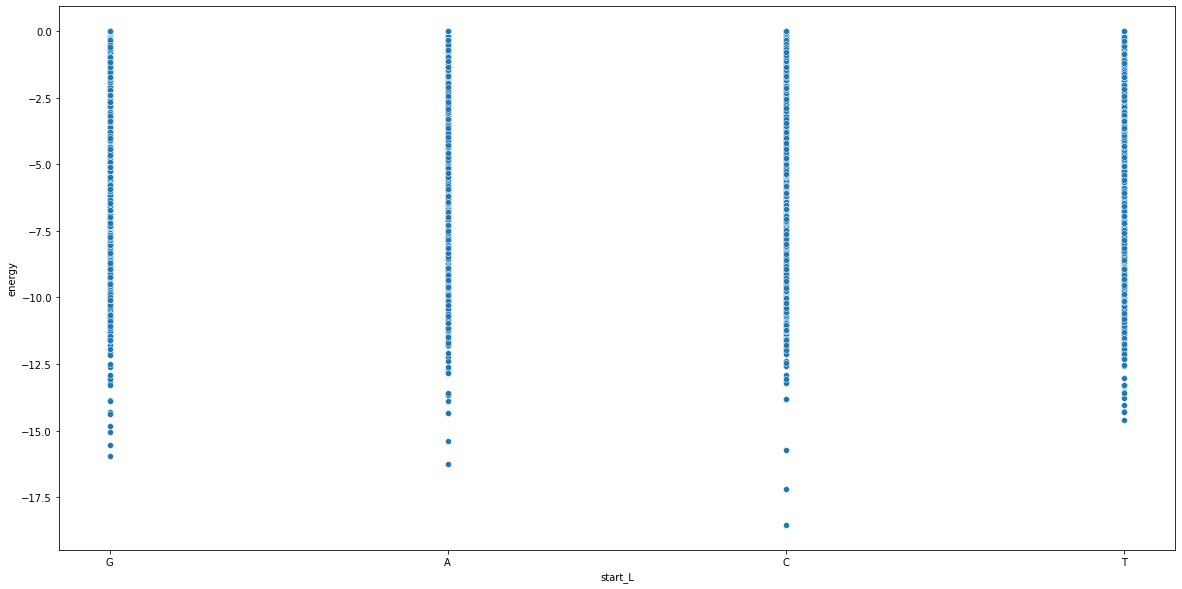

In [11]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="start_L", y="energy")

<AxesSubplot:xlabel='end_L', ylabel='energy'>

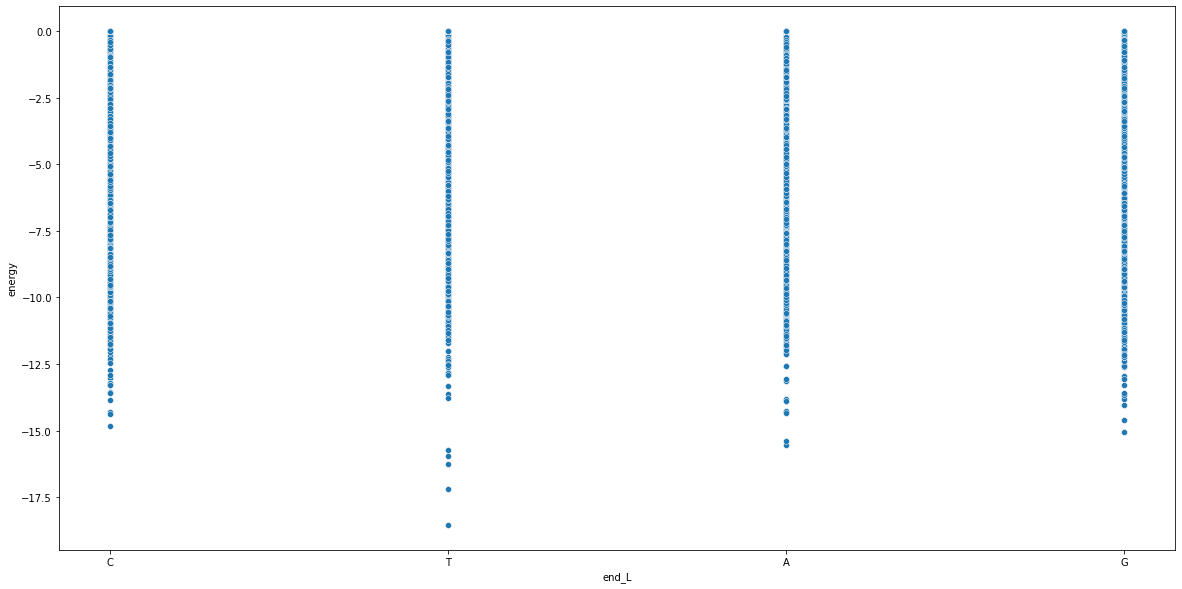

In [12]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="end_L", y="energy")

<AxesSubplot:xlabel='startend_LL', ylabel='energy'>

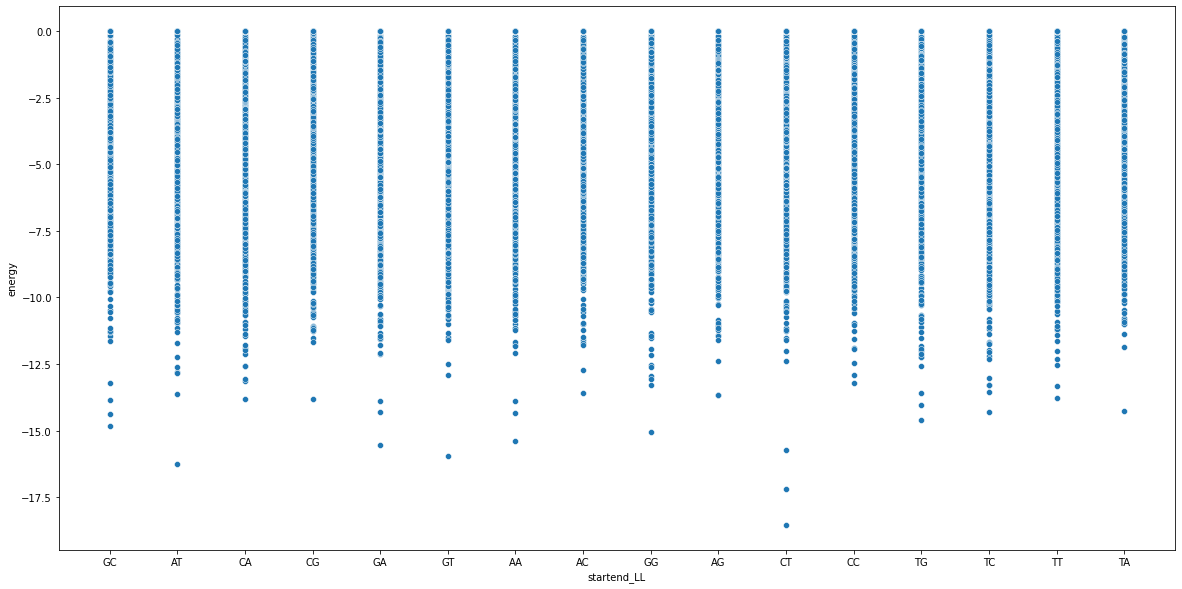

In [13]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="startend_LL", y="energy")

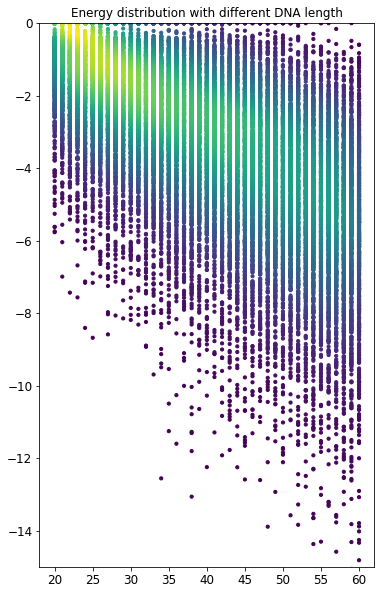

In [29]:


x = df.len
y = df.energy

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots(figsize=(6, 10))
ax.scatter(x, y, c=z, s=10)
plt.ylim(-15,0)
plt.title("Energy distribution with different DNA length")
plt.show()